# Abstract

In this notebook, I am solving a classification problem of Wine Quality

To achieve this I am implementing a single neuron neural network with stochastic gradient descent for 
optimization

Along with that multiple activation functions will be used such as Sigmoid, ReLU during traing of the model

Loss and accuracy matrics for training and testing of the model will be calculated and visualized using graphs


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
#For Confusion Matrix
from sklearn.metrics import confusion_matrix

In [3]:
# Reading data in pd dataframe

pdf = pd.read_csv('./wine.csv')
pdf.dropna(inplace=True)
pdf.quality = pdf.quality.astype('category').cat.codes
pdf.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
311,7.9,0.530,0.24,2.0,0.072,15.0,105.0,0.99600,3.27,0.54,9.4,1
1537,5.4,0.580,0.08,1.9,0.059,20.0,31.0,0.99484,3.50,0.64,10.2,1
724,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,0
829,5.9,0.610,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,1
233,6.9,0.520,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,0


In [4]:
pdf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                    int8
dtype: object

### Removing Outliers

Removing outliers whose z-score is greater than 3 i.e. 3 std from mean

In [5]:
pdf = pdf[(np.abs(stats.zscore(pdf)) < 3).all(axis=1)]
pdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,0.539781
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.498586
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,1.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,1.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,1.000000


In [6]:
pdf.shape

(1458, 12)

In [55]:
# Generate Train test split for valiation

def train_test_split(x,y,size):
    new_size = int(len(x)*size)
    x_train = x[:new_size]
    y_train = y[:new_size]
    x_test = x[new_size:]
    y_test = y[new_size:]
    return x_train,y_train,x_test,y_test

def prepareData():
    x = pdf.copy()
    y = pdf.quality
    x.drop(columns=['quality'],inplace=True)
    x_train, y_train, x_test, y_test = train_test_split(x,y,0.8)
    print('Training: ', x_train.shape)
    print('Test: ', y_train.shape)
    return x_train,y_train,x_test,y_test

## Sigmoid

A sigmoid function is a mathematical function having “S”-shaped curve or sigmoid curve.

It's derived as F(x) = 1/(1 + e^(-x)) and used as activation function in neural networks

In [56]:
#Sigmoid Activation Functions
def sigmoid(val):
    return 1 / (1 + math.exp(-val))

## Neural Network with Sigmoid Activation Function

In [77]:

x_train,y_train,x_test,y_test = prepareData()

# initilizing weights as per number of features
weight = np.zeros(x_train.shape[1])
bias = 0
lossVal = 0

#Converting df into array
x_train = x_train.to_numpy()
y_train = np.array(y_train)
# y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = np.array(y_test)
# y_test = y_test.to_numpy()


# Calculating accuracy matrics
def accuracy(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if (actual[i]>0.5) == (predicted[i]>0.5):
            correct += 1
    return correct / float(len(actual)) * 100.0


# setting neural network hyperparameters
epochs = 60
learningRate = 0.10
Training_data = {"trainLoss":[],"testLoss":[],"trainAccuracy":[],"testAccurcay":[]}

#Predicting from train using Sigmoid Activation function
#Calculating losss
def predict_train():
    loss = 0
    train_predicted = []
    for i in range(x_train.shape[0]):
        y_pred_temp = sigmoid(np.dot(x_train[i],weight) + bias)        
        loss += (y_train[i] - y_pred_temp)*(y_train[i] - y_pred_temp) #J
        train_predicted.append(y_pred_temp)
    loss = loss/(2*x_train.shape[0])
    return train_predicted, loss

#Predicting from test using Sigmoid Activation function
#Calculating losss
def predict_test():
    loss_test = 0
    test_predicted = []
    for i in range(x_test.shape[0]):
        y_pred_temp = sigmoid(np.dot(x_test[i],weight)+bias)        
        loss_test += (y_test[i] - y_pred_temp)*(y_test[i] - y_pred_temp) #J
        test_predicted.append(y_pred_temp) 
    return test_predicted, loss_test

#Calculating and updating gradient bias and weight
def update_bias(bias):
    #Accumulating gradient with respect to bias and weights
    grad_bias = 0
    grad_w = np.zeros(len(weight))
    for i in range(x_train.shape[0]):        
        grad_bias += (train_predicted[i] - y_train[i])*(train_predicted[i])*(1-train_predicted[i]) #dJ/db
        for j in range(len(weight)):
            #dJ/dW_j
            grad_w[j] += (train_predicted[i] - y_train[i])*(train_predicted[i])*(1-train_predicted[i])*(x_train[i][j])

    #Updating bias
    bias = bias - grad_bias*learningRate/x_train.shape[0]   
    
    return grad_w, bias

#Updating weights
def update_weight():
    #Updating weights    
    for j in range(len(weight)):
        weight[j] = weight[j] - grad_w[j]*learningRate/x_train.shape[0]
    
    return weight


for epoch in range(epochs):

    train_predicted, loss = predict_train()
    test_predicted, loss_test = predict_test()

    loss_test = loss_test/(2*x_test.shape[0])
    trainAcc = accuracy(y_train,train_predicted)
    testAcc = accuracy(y_test,test_predicted)

    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccurcay"].append(testAcc)

    #printing matrics every 10 rounds
    if epoch%10==0:
        print("J, Train loss:%f" %(loss))
        print("J, Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))

    train_predicted = np.array(train_predicted)

    grad_w, bias = update_bias(bias)

    weight = update_weight()


Training:  (1166, 11)
Test:  (1166,)
J, Train loss:0.125000
J, Test loss:0.125000
Training accuracy: 45.283019
Validation accuracy: 48.972603
J, Train loss:0.188639
J, Test loss:0.199266
Training accuracy: 49.571184
Validation accuracy: 46.232877
J, Train loss:0.189951
J, Test loss:0.207697
Training accuracy: 52.658662
Validation accuracy: 47.945205
J, Train loss:0.131274
J, Test loss:0.158252
Training accuracy: 64.150943
Validation accuracy: 56.849315
J, Train loss:0.138247
J, Test loss:0.179377
Training accuracy: 64.751286
Validation accuracy: 54.794521
J, Train loss:0.142352
J, Test loss:0.183530
Training accuracy: 64.065180
Validation accuracy: 55.136986


## Confusion Matrix

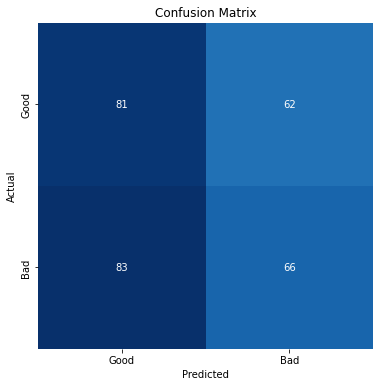

In [78]:
# using sklearn for confusion matrics
cm = confusion_matrix(y_test, np.rint(test_predicted), labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5,1.5], labels = ["Good", "Bad"])
plt.yticks(ticks=[0.5,1.5], labels = ["Good", "Bad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## F1 Score

In [79]:
#calcularing F1 Score
true_positive = cm [0][0]
false_positive = cm [1][0]
true_negative = cm [1][1]
false_negative = cm [0][1]

total_positive = true_positive + false_positive

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

F1_Score = 2 * (precision * recall) / (precision + recall)

print('F1-Score:', F1_Score)

F1-Score: 0.5276872964169381


## Accuracy Matrix

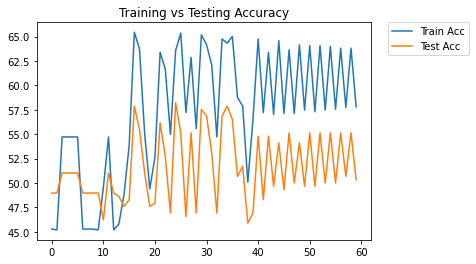

In [80]:

plt.plot(Training_data['trainAccuracy'],label='Train Acc')
plt.plot(Training_data['testAccurcay'],label="Test Acc")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Training vs Testing Accuracy')
plt.show()

## Loss Matrix

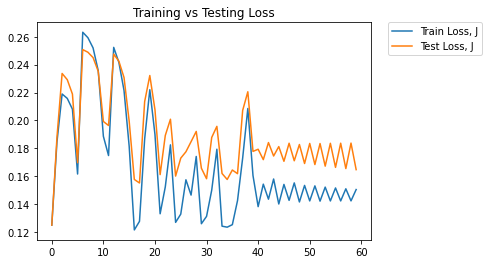

In [81]:
plt.plot(Training_data['trainLoss'],label='Train Loss, J')
plt.plot(Training_data['testLoss'],label="Test Loss, J")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Training vs Testing Loss')
plt.show()

## ReLU

Rectified linear activation unit (ReLU)

It's used as non-linear activation function which is used in deep neural network

The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

This function makes negative values as 0

In [82]:
#ReLU activation function
def relu(x):
    return max(0.0, x)


## Neural Network with ReLU Activation Function

In [83]:


# initilize weights
weight = np.zeros(x_train.shape[1])
bias = 0
lossVal = 0

# setting neural network hyperparameters
epochs = 60
learningRate = 0.10
Training_data = {"trainingLoss":[],"testingLoss":[],"trainingAccuracy":[],"testingAccurcay":[]}

#ReLU
for epoch in range(epochs):
    loss = 0
    train_predicted = []
    for i in range(x_train.shape[0]):
        y_pred_temp = relu(sigmoid(np.dot(x_train[i],weight)+bias))        
        loss += (y_train[i] - y_pred_temp)*(y_train[i] - y_pred_temp) #J
        train_predicted.append(y_pred_temp)
        
    loss = loss/(2*x_train.shape[0])

    loss_test = 0
    test_predicted = []
    for i in range(x_test.shape[0]):
        y_pred_temp = relu(sigmoid(np.dot(x_test[i],weight)+bias))        
        loss_test += (y_test[i] - y_pred_temp)*(y_test[i] - y_pred_temp) #J
        test_predicted.append(y_pred_temp)        
    
    loss_test = loss_test/(2*x_test.shape[0])
    trainAcc = accuracy(y_train,train_predicted)
    testAcc = accuracy(y_test,test_predicted)
    
    Training_data["trainingLoss"].append(loss)
    Training_data["testingLoss"].append(loss_test)
    Training_data["trainingAccuracy"].append(trainAcc)
    Training_data["testingAccurcay"].append(testAcc)
    
    
    if epoch%20==0:
        print("J, Train loss:%f" %(loss))
        print("J, Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    train_predicted = np.array(train_predicted)
    
    #Accumulate gradient with respect to bias and weights
    grad_bias = 0
    grad_w = np.zeros(len(weight))
    for i in range(x_train.shape[0]):        
        grad_bias += (train_predicted[i] - y_train[i])*(train_predicted[i])*(1-train_predicted[i]) #dJ/db
        for j in range(len(weight)):
            #dJ/dW_j
            grad_w[j] += (train_predicted[i] - y_train[i])*(train_predicted[i])*(1-train_predicted[i])*(x_train[i][j])

    #Update bias
    bias = bias - grad_bias*learningRate/x_train.shape[0]    
    
    #Update weights    
    for j in range(len(weight)):
        weight[j] = weight[j] - grad_w[j]*learningRate/x_train.shape[0]


J, Train loss:0.125000
J, Test loss:0.125000
Training accuracy: 45.283019
Validation accuracy: 48.972603
J, Train loss:0.189951
J, Test loss:0.207697
Training accuracy: 52.658662
Validation accuracy: 47.945205
J, Train loss:0.138247
J, Test loss:0.179377
Training accuracy: 64.751286
Validation accuracy: 54.794521


## Confusion Matrix

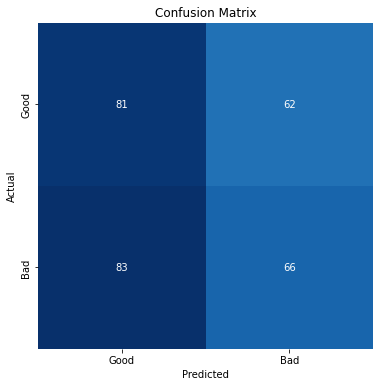

In [84]:

cm = confusion_matrix(y_test, np.rint(test_predicted), labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5,1.5], labels = ["Good", "Bad"])
plt.yticks(ticks=[0.5,1.5], labels = ["Good", "Bad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Accuracy Matrix

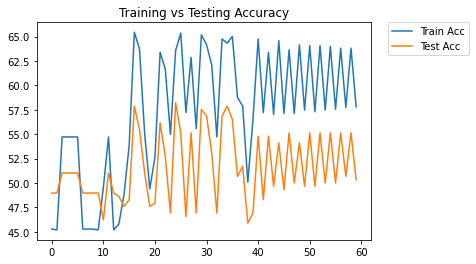

In [85]:

plt.plot(Training_data['trainingAccuracy'],label='Train Acc')
plt.plot(Training_data['testingAccurcay'],label="Test Acc")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Training vs Testing Accuracy')
plt.show()

## Loss Matrix

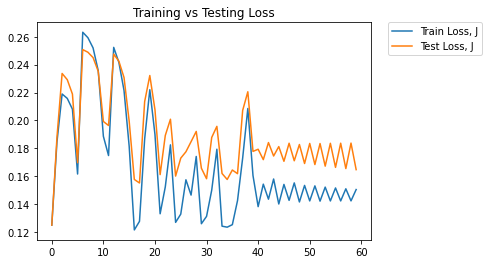

In [86]:

plt.plot(Training_data['trainingLoss'],label='Train Loss, J')
plt.plot(Training_data['testingLoss'],label="Test Loss, J")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Training vs Testing Loss')
plt.show()

## F1 Score

In [87]:
true_positive = cm [0][0]
false_positive = cm [1][0]
true_negative = cm [1][1]
false_negative = cm [0][1]

total_positive = true_positive + false_positive

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

F1_Score = 2 * (precision * recall) / (precision + recall)

print('F1_Score:', F1_Score)

F1_Score: 0.5276872964169381


# Regularization

## Ridge (L2)

Ridge Regression, which penalizes sum of squared coefficients (L2 penalty)

It helps overcoming over-fitting problem in machine learning models

In [94]:
x_train,y_train,x_test,y_test = prepareData()

# initilizing weights as per number of features
weight = np.zeros(x_train.shape[1])
bias = 0
lossVal = 0

#Converting df into array
x_train = x_train.to_numpy()
y_train = np.array(y_train)
# y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = np.array(y_test)
# y_test = y_test.to_numpy()


# Calculating accuracy matrics
def accuracy(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if (actual[i]>0.5) == (predicted[i]>0.5):
            correct += 1
    return correct / float(len(actual)) * 100.0


# setting neural network hyperparameters
epochs = 60
learningRate = 0.10
Training_data = {"trainLoss":[],"testLoss":[],"trainAccuracy":[],"testAccurcay":[]}

#Predicting from train using Sigmoid Activation function
#Calculating losss
def predict_train():
    loss = 0
    train_predicted = []
    for i in range(x_train.shape[0]):
        y_pred_temp = sigmoid(np.dot(x_train[i],weight) + bias)        
        loss += (y_train[i] - y_pred_temp)*(y_train[i] - y_pred_temp) #Squaring for L2 regularization
        train_predicted.append(y_pred_temp)
    loss = loss/(2*x_train.shape[0])
    return train_predicted, loss

#Predicting from test using Sigmoid Activation function
#Calculating losss
def predict_test():
    loss_test = 0
    test_predicted = []
    for i in range(x_test.shape[0]):
        y_pred_temp = sigmoid(np.dot(x_test[i],weight)+bias)        
        loss_test += (y_test[i] - y_pred_temp)*(y_test[i] - y_pred_temp) #Squaring for L2 regularization
        test_predicted.append(y_pred_temp) 
    return test_predicted, loss_test

#Calculating and updating gradient bias and weight
def update_bias(bias):
    #Accumulating gradient with respect to bias and weights
    grad_bias = 0
    grad_w = np.zeros(len(weight))
    for i in range(x_train.shape[0]):        
        grad_bias += (train_predicted[i] - y_train[i])*(train_predicted[i])*(1-train_predicted[i]) #dJ/db
        for j in range(len(weight)):
            #dJ/dW_j
            grad_w[j] += (train_predicted[i] - y_train[i])*(train_predicted[i])*(1-train_predicted[i])*(x_train[i][j])

    #Updating bias
    bias = bias - grad_bias*learningRate/x_train.shape[0]   
    
    return grad_w, bias

#Updating weights
def update_weight():
    #Updating weights    
    for j in range(len(weight)):
        weight[j] = weight[j] - grad_w[j]*learningRate/x_train.shape[0]
    
    return weight


for epoch in range(epochs):

    train_predicted, loss = predict_train()
    test_predicted, loss_test = predict_test()

    loss_test = loss_test/(2*x_test.shape[0])
    trainAcc = accuracy(y_train,train_predicted)
    testAcc = accuracy(y_test,test_predicted)

    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccurcay"].append(testAcc)

    #printing matrics every 10 rounds
    if epoch%10==0:
        print("J, Train loss:%f" %(loss))
        print("J, Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))

    train_predicted = np.array(train_predicted)

    grad_w, bias = update_bias(bias)

    weight = update_weight()


Training:  (1166, 11)
Test:  (1166,)
J, Train loss:0.125000
J, Test loss:0.125000
Training accuracy: 45.283019
Validation accuracy: 48.972603
J, Train loss:0.188639
J, Test loss:0.199266
Training accuracy: 49.571184
Validation accuracy: 46.232877
J, Train loss:0.189951
J, Test loss:0.207697
Training accuracy: 52.658662
Validation accuracy: 47.945205
J, Train loss:0.131274
J, Test loss:0.158252
Training accuracy: 64.150943
Validation accuracy: 56.849315
J, Train loss:0.138247
J, Test loss:0.179377
Training accuracy: 64.751286
Validation accuracy: 54.794521
J, Train loss:0.142352
J, Test loss:0.183530
Training accuracy: 64.065180
Validation accuracy: 55.136986


## Lasso (L1)

Lasso regression is a regularization technique which is shrinks data values are shrunk towards a central point as the mean

In Lasso it penalizes the sum of absolute values of the coefficients (L1 penalty)

In [95]:

# initilize weights
weight = np.zeros(x_train.shape[1])
bias = 0
lossVal = 0


# setting neural network hyperparameters
epochs = 60
learningRate = 0.10
Training_data = {"trainingLoss":[],"testingLoss":[],"trainingAccuracy":[],"testingAccurcay":[]}


def predict_train():
    YP = []
    loss = 0
    for i in range(x_train.shape[0]):
        y_pred_temp = sigmoid(np.dot(x_train[i],weight) + bias)        
        loss += np.absolute(y_train[i] - y_pred_temp) #taking absolute for L1 regularization
        YP.append(y_pred_temp)
    loss = loss/(2*x_train.shape[0])
    
    return YP, loss

def predict_test():
    YP_test = []
    loss_test = 0
    for i in range(x_test.shape[0]):
        y_pred_temp = sigmoid(np.dot(x_test[i],weight)+bias)        
        loss_test += np.absolute(y_test[i] - y_pred_temp) #taking absolute for L1 regularization
        YP_test.append(y_pred_temp) 
    return YP_test, loss_test

# def train(epoch,bias):
for epoch in range(epochs):

    YP, loss = predict_train()
    YP_test, loss_test = predict_test()

    loss_test = loss_test/(2*x_test.shape[0])
    trainAcc = accuracy(y_train,YP)
    testAcc = accuracy(y_test,YP_test)

    Training_data["trainingLoss"].append(loss)
    Training_data["testingLoss"].append(loss_test)
    Training_data["trainingAccuracy"].append(trainAcc)
    Training_data["testingAccurcay"].append(testAcc)


    if epoch%10==0:
        print("J, Train loss:%f" %(loss))
        print("J, Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))

    YP = np.array(YP)

    grad_w, bias = update_bias(bias)

    weight = update_weight()


J, Train loss:0.250000
J, Test loss:0.250000
Training accuracy: 45.283019
Validation accuracy: 48.972603
J, Train loss:0.226415
J, Test loss:0.244863
Training accuracy: 54.716981
Validation accuracy: 51.027397
J, Train loss:0.226415
J, Test loss:0.244863
Training accuracy: 54.716981
Validation accuracy: 51.027397
J, Train loss:0.226415
J, Test loss:0.244863
Training accuracy: 54.716981
Validation accuracy: 51.027397
J, Train loss:0.226415
J, Test loss:0.244863
Training accuracy: 54.716981
Validation accuracy: 51.027397
J, Train loss:0.226415
J, Test loss:0.244863
Training accuracy: 54.716981
Validation accuracy: 51.027397


## Conclusion

In this notebook, I have solved a classification problem of Wine quality by implementing single neuron network with activation functions such as Sigmoid and ReLU

We trained the model and then calculated loss, accuracy and F1-score matrix for the model and visualized training, testing accuracy and loss by graph

we also implemented L1 and L2 regularization